### Import libraries

In [19]:
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from keras.utils import set_random_seed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

### Import data into data frame

In [20]:
# fix random seed to get same randomised set each time
tf.random.set_seed(7)
keras.utils.set_random_seed(1337)

In [21]:
usd_jpy = yf.download("USDJPY=X", start="2023-01-29", end="2024-01-29")["Adj Close"].rename("USD/JPY")
sp500 = yf.download("^SPX", start="2023-01-29", end="2024-01-29")["Adj Close"].rename("S&P 500")
n225 = yf.download("^N225", start="2023-01-29", end="2024-01-29")["Adj Close"].rename("Nikkei 225")
df = pd.concat([usd_jpy, sp500, n225], axis=1).ffill().dropna()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


### Why stock market data?

The idea here is if a particular countries stock market is doing well, their currency will most likely get stronger. By feeding in historical data for the S&P 500 (US stock market) and Nikkei 225 (Japanese stock market) as well as historical USD/JPY data, we can better predict future vaules of USD/JPY

### View all currency and stock market data on same graph

For Neural Networks it is important that our features are on the same scale, so we will apply some scaling such that all of our values are between 0 and 1. This has been done below:

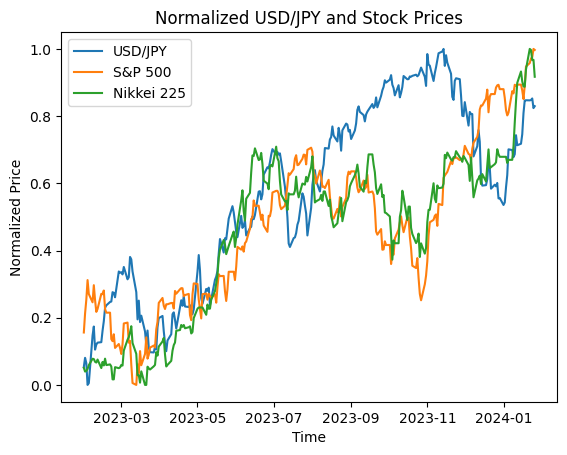

In [22]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(df)

# Get the dates for the x-axis
dates = df.index

plt.plot(dates, dataset)
plt.title('Normalized USD/JPY and Stock Prices')
plt.xlabel('Time')
plt.ylabel('Normalized Price')
plt.legend(['USD/JPY', 'S&P 500', 'Nikkei 225'])
plt.show()

As we can see above, there does seem to be a link between activity in the US and Japanese stock markets and the performance of USD/JPY. Let's see how the LSTM perfoms with these 3 sets of data.

### Creating the LSTM

Here is how we feed the data into the LSTM:

matrix(no. of examples, lookback - no. of timesteps you look back, features(in this case 3 - USD/JPY, SNP500, N225))

- __Matrix__: Refers to the shape of the input data, which is structured as a matrix.
- __Number of examples__: This refers to the number of samples or data points in the dataset. Each example represents a single time step in the sequence.
- __Lookback__: This indicates how many previous time steps the model considers to predict the current time step. It's essentially the window size of the input sequence.
- __Number of timesteps you look back__: This is similar to the "lookback" mentioned earlier. It signifies the number of time steps you are looking back in your sequence.
- __Features__: Refers to the number of features or variables in the dataset. In this case, we have three features: USD/JPY, S&P 500, and Nikkei 225.

For example, if we have 100 examples, a lookback of 30 time steps, and 3 features, the shape of the input data would be (100, 30, 3). This means we have 100 sequences, each sequence contains 30 time steps, and each time step has 3 features.

In [23]:
lookback = 30
X = np.empty((dataset.shape[0]-lookback, lookback, dataset.shape[1]))
Y = np.empty(dataset.shape[0]-lookback)

In [24]:
for i in range(X.shape[0]):
    X[i] = dataset[i:i+lookback]
    Y[i] = dataset[i+lookback,0]

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle=False)

In [26]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(40, input_shape=(lookback, 3)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=2, validation_split=0.1)

Epoch 1/100


/Users/neel/Desktop/Other/Uni/3rd_Year/Project/3rd-year-project/venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


154/154 - 1s - 8ms/step - loss: 0.0189 - val_loss: 0.0640
Epoch 2/100
154/154 - 0s - 3ms/step - loss: 0.0061 - val_loss: 0.0376
Epoch 3/100
154/154 - 0s - 3ms/step - loss: 0.0050 - val_loss: 0.0286
Epoch 4/100
154/154 - 0s - 3ms/step - loss: 0.0043 - val_loss: 0.0238
Epoch 5/100
154/154 - 0s - 3ms/step - loss: 0.0039 - val_loss: 0.0207
Epoch 6/100
154/154 - 0s - 3ms/step - loss: 0.0036 - val_loss: 0.0185
Epoch 7/100
154/154 - 0s - 3ms/step - loss: 0.0033 - val_loss: 0.0168
Epoch 8/100
154/154 - 0s - 3ms/step - loss: 0.0031 - val_loss: 0.0155
Epoch 9/100
154/154 - 0s - 3ms/step - loss: 0.0030 - val_loss: 0.0144
Epoch 10/100
154/154 - 0s - 3ms/step - loss: 0.0028 - val_loss: 0.0133
Epoch 11/100
154/154 - 0s - 3ms/step - loss: 0.0027 - val_loss: 0.0124
Epoch 12/100
154/154 - 0s - 3ms/step - loss: 0.0026 - val_loss: 0.0115
Epoch 13/100
154/154 - 0s - 3ms/step - loss: 0.0025 - val_loss: 0.0107
Epoch 14/100
154/154 - 0s - 3ms/step - loss: 0.0024 - val_loss: 0.0100
Epoch 15/100
154/154 - 0s -

In [27]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 40)             │         7,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,245 (82.99 KB)

 Trainable params: 7,081 (27.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,164 (55.33 KB)

plot of loss and validation loss on the same chart below:

In [28]:
#history.history #loss for each epoch

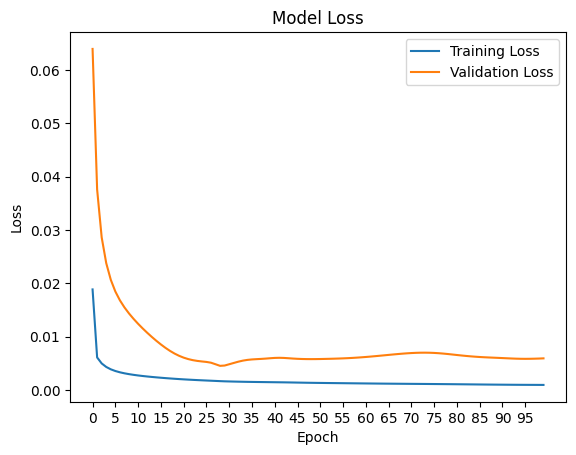

Minimum Validation Loss: 0.004527750890702009
Epoch of Minimum Validation Loss: 28


In [29]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.xticks(range(0, len(history.history['loss']), 5))
plt.show()

# Identify and output the minimum point of val_loss
min_val_loss = min(history.history['val_loss'])
min_val_loss_index = history.history['val_loss'].index(min_val_loss)
print("Minimum Validation Loss:", min_val_loss)
print("Epoch of Minimum Validation Loss:", min_val_loss_index)

Where val_loss is at its minimum (28) is where the model performs at its most optimal

In [30]:
predictions = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


In [31]:
len(predictions)

58

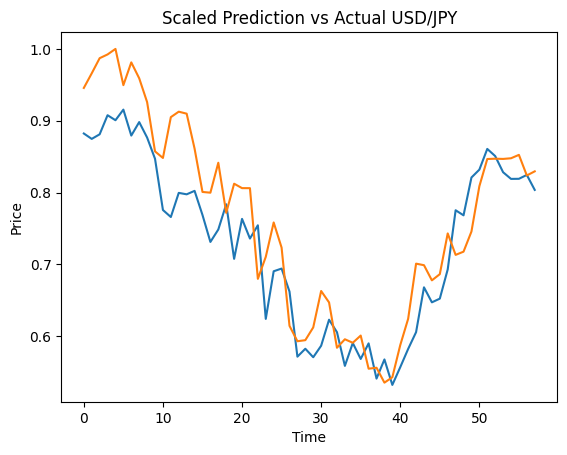

In [32]:
plt.plot(predictions, label='Prediction')
plt.title('Scaled Prediction vs Actual USD/JPY')
plt.xlabel('Time')
plt.ylabel('Price')
plt.plot(Y_test, label='Actual')

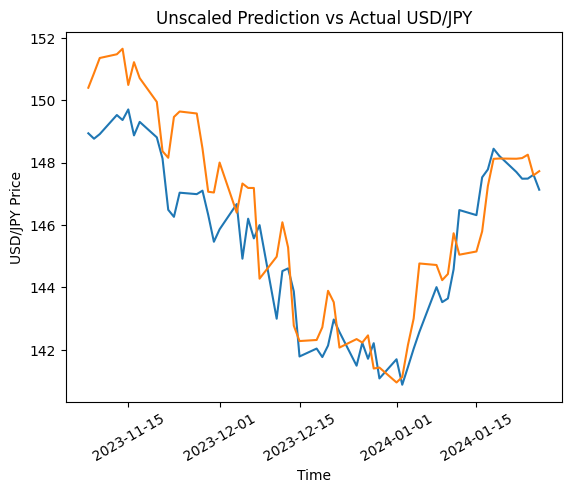

In [33]:
unscaled = scaler.data_min_[0] + (predictions * scaler.data_range_[0])

plt.plot(pd.DataFrame(data=unscaled, index=df.index[-58:]))
plt.xticks(rotation=30)
plt.title('Unscaled Prediction vs Actual USD/JPY')
plt.xlabel('Time')
plt.ylabel('USD/JPY Price')
plt.plot(usd_jpy.iloc[-58:])

## MAE:

In [41]:
df["forecast"] = np.nan
df.iloc[-len(predictions):,-1] = unscaled.reshape((unscaled.shape[0],))
df

,USD/JPY,S&P 500,Nikkei 225,forecast,errors
Date,,,,,
2023-01-30,129.854004,4017.770020,27433.400391,NaN,NaN
2023-01-31,130.479004,4076.600098,27327.109375,NaN,NaN
2023-02-01,130.110001,4119.209961,27346.880859,NaN,NaN
2023-02-02,128.621994,4179.759766,27402.050781,NaN,NaN
2023-02-03,128.746002,4136.479980,27509.460938,NaN,NaN
...,...,...,...,...,...
2024-01-22,148.121002,4850.430176,36546.949219,NaN,147.694916
2024-01-23,148.141998,4864.600098,36517.570312,NaN,147.481094
2024-01-24,148.251007,4868.549805,36226.480469,NaN,147.483932


In [35]:
df["errors"] = abs(df["forecast"] - df["USD/JPY"])
df

,USD/JPY,S&P 500,Nikkei 225,forecast,errors
Date,,,,,
2023-01-30,129.854004,4017.770020,27433.400391,NaN,NaN
2023-01-31,130.479004,4076.600098,27327.109375,NaN,NaN
2023-02-01,130.110001,4119.209961,27346.880859,NaN,NaN
2023-02-02,128.621994,4179.759766,27402.050781,NaN,NaN
2023-02-03,128.746002,4136.479980,27509.460938,NaN,NaN
...,...,...,...,...,...
2024-01-22,148.121002,4850.430176,36546.949219,147.694916,0.426086
2024-01-23,148.141998,4864.600098,36517.570312,147.481094,0.660904
2024-01-24,148.251007,4868.549805,36226.480469,147.483932,0.767075


unscaled = data minimum + (scaled value * data range)

In [38]:
rmse = mean_squared_error(usd_jpy.iloc[-58:], unscaled, squared=False)
print("RMSE:", rmse)

RMSE: 1.3922109948619616


/Users/neel/Desktop/Other/Uni/3rd_Year/Project/3rd-year-project/venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
